# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [1]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1625k      0 --:--:-- --:--:-- --:--:-- 1625k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [4]:
query = '''
SELECT c.id,
    c.gender,
    c.married,
    c.age,
    c.graduated,
    c.score,
    p.category AS profession,
    e.duration AS work_experience,
    c.segment, 
    COUNT(r.id)+1 as family_size 
FROM customers c
LEFT JOIN experiences e on e.customer_id = c.id 
LEFT JOIN relatives r on r.customer_id  = c.id 
LEFT JOIN professions p on p.id = e.profession_id
GROUP BY c.id'''

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [5]:
import sqlite3
conn = sqlite3.connect('db/customers.sqlite')
c = conn.cursor()

In [6]:
c.execute(query)

In [7]:
raw_data = c.fetchall()

In [8]:
columns = ["id",
           "gender",
           "married",
           "age",
           "graduated",
           "score",
           "profession",
           "work_experience",
           "segment",
           "family_size"]

In [9]:
import pandas as pd
data = pd.DataFrame(raw_data, columns = columns )

In [10]:
data.head(10)

,id,gender,married,age,graduated,score,profession,work_experience,segment,family_size
0,1,Male,No,22,No,Low,Healthcare,1.0,D,4
1,2,Female,Yes,38,Yes,Average,Engineer,NaN,A,3
2,3,Female,Yes,67,Yes,Low,Engineer,1.0,B,1
3,4,Male,Yes,67,Yes,High,Lawyer,0.0,B,2
4,5,Female,Yes,40,Yes,High,Entertainment,NaN,A,6
5,6,Male,Yes,56,No,Average,Artist,0.0,C,2
6,7,Male,No,32,Yes,Low,Healthcare,1.0,C,3
7,8,Female,No,33,Yes,Low,Healthcare,1.0,D,3
8,9,Female,Yes,61,Yes,Low,Engineer,0.0,D,3
9,10,Female,Yes,55,Yes,Average,Artist,1.0,C,4


In [11]:
data.shape

(8068, 10)

#### 💾 Save your results

Run the following cell to save your results.

In [12]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [13]:
customers = pd.read_csv('data/customers.csv')

In [14]:
customers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


**💾 Save your results**

Run the following cell to save your results.

In [15]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [16]:
# Start your data analysis!

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# information regarding the dataset in general
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


# Customers Data Analysis

#### Data set overview:
- This is the data set we have about our customers

In [19]:
customers.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


- The basic informations about our customers in general:

In [20]:
customers.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [21]:
# check the nan value in different columns
customers.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

#### Quick view of distribution of different columns:

<AxesSubplot:xlabel='Family_Size'>

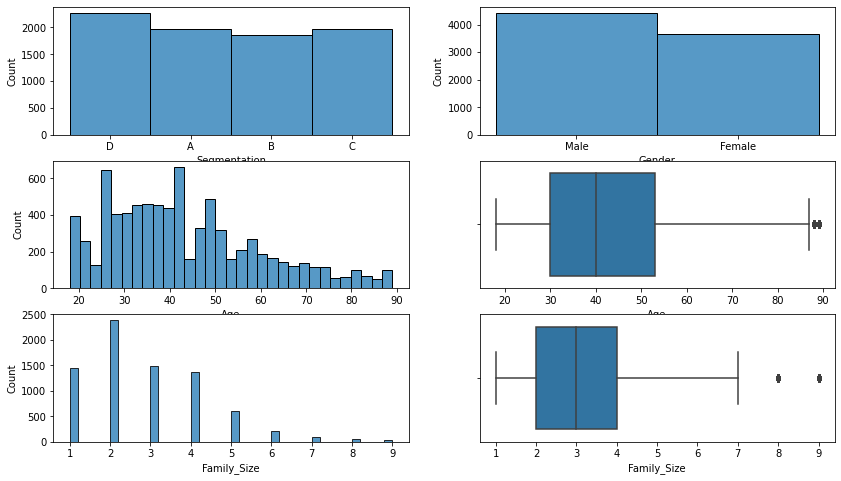

In [22]:
# basic analysis of different columns

fig, axes = plt.subplots(3, 2, figsize=(14, 8))
sns.histplot(customers['Segmentation'], ax=axes[0,0])
sns.histplot(customers['Gender'], ax=axes[0,1])
sns.histplot(customers['Age'], ax=axes[1,0])
sns.boxplot(customers['Age'], ax=axes[1,1])
sns.histplot(customers['Family_Size'], ax=axes[2,0])
sns.boxplot(customers['Family_Size'], ax=axes[2,1])


#### This is to check if the Spending_Score has something to do with the Segmentation:

- With observation, we saw that we have spending group in each segmentation groups, only for segmentation group D, there are much more low spending customers. But spending score is not the only indicator for the segmentation, we need more information.

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

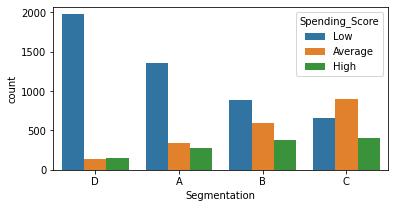

In [51]:
# check the segmentation with the spending score group relations
plt.figure(figsize=(6,3))
sns.countplot(customers.Segmentation, hue=customers.Spending_Score)

In [24]:
# check the age groups relation with the segmentation
def age_group(age):
    if age <= 30 & age >= 18:
        return '18-30'
    elif age <= 40:
        return '31-40'
    elif age <= 53:
        return "41-53"
    elif age <= 85:
        return "54-85"
    else:
        return '85+'

In [25]:
customers['age_group'] = customers.Age.apply(lambda x: age_group(x))

In [26]:
customers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,age_group
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,18-30
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,31-40
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,54-85
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,54-85
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,31-40
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,D,18-30
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D,31-40
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D,31-40
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B,31-40


#### Age VS Spending_Score, and Segmentation:
- I observed the Age groups with the segmentation group's relation, and we don't see the all age groups presents in each segmentation. So the customer segmentation is not based on the customer ages only neither. Need further information.

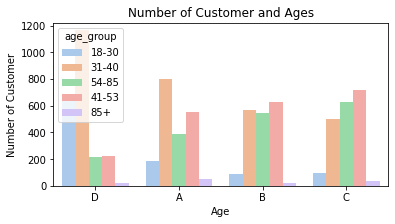

In [52]:
plt.figure(figsize=(6,3))
sns.countplot(customers.Segmentation, palette="pastel",hue=customers.age_group)
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

- Here I would like to check if the age group has something to do with the spend scores, and surprisely the 31-40 age group is with low spend. 

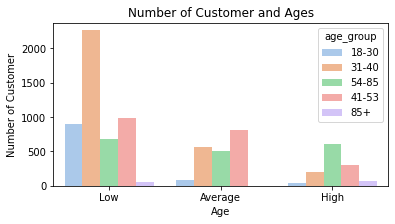

In [53]:
plt.figure(figsize=(6,3))
sns.countplot(customers.Spending_Score, palette="pastel",hue=customers.age_group)
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

#### Profession VS the spending score
- This is to check if any prefession has significant spends:

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

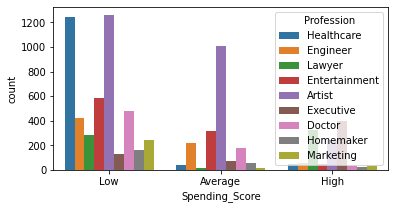

In [54]:
plt.figure(figsize=(6,3))
sns.countplot(customers.Spending_Score, hue=customers.Profession)

- To check the age distribution vs the Segmentations, we see that the groupd D are usually younger(blue points)

<AxesSubplot:xlabel='ID', ylabel='Age'>

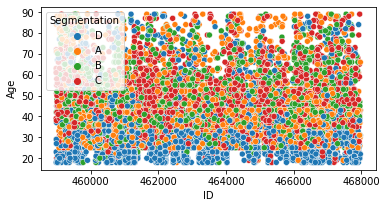

In [55]:
plt.figure(figsize=(6,3))
sns.scatterplot(customers['ID'], customers['Age'], data=customers, hue='Segmentation')

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [34]:
customers_dummies = customers.copy().dropna().drop(columns=['age_group'])
df = pd.get_dummies(customers_dummies, prefix=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Segmentation'])
df

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,462809,22,1.0,4.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,466315,67,1.0,1.0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,461735,67,0.0,2.0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
5,461319,56,0.0,2.0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
6,460156,32,1.0,3.0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,41,0.0,5.0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
8064,464685,35,3.0,4.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8065,465406,33,1.0,1.0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
8066,467299,27,1.0,4.0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


#### Correlation Analysis with different columns

<AxesSubplot:>

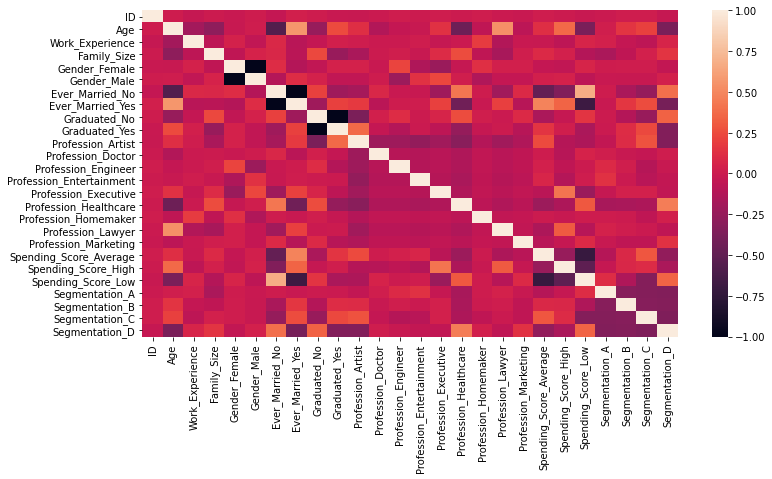

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

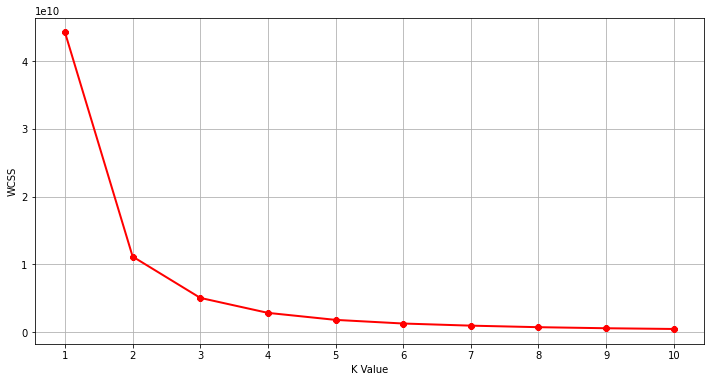

In [37]:
# Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value.

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

- according to the plot, we saw that the k_value on 3 is optimised, while from 4 it's not obivious to have more clusters

In [36]:
n_clusters = 3

**💾 Save your results**

Run the following cell to save your results.

In [38]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [39]:
# Load the data and display the first rows
data = pd.read_csv('data/customers_encoded.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,is_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

<AxesSubplot:xlabel='ID', ylabel='Age'>

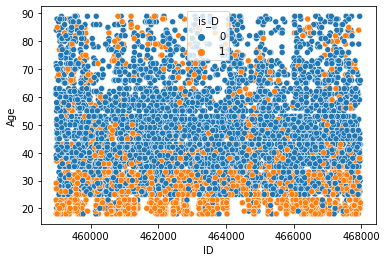

In [40]:
# Test
from sklearn import linear_model
from scipy import stats
import numpy as np
X = data['Age']
y = data['ID']
sns.scatterplot(y, X, data=data, hue='is_D')

We can see from the plot that the most of the D segmenation clients are younger, around 18 - 30 years old.

In [41]:
# this is to calculate the age mean of the group D and the rest of the group. We see that the group D is younger
d_customers = data[data['is_D']==1]
other_customers = data[data['is_D']==0]
d_age_mean = d_customers['Age'].mean()
other_age_mean = other_customers['Age'].mean()
total_age_mean = data['Age'].mean()
std_age = np.std(data['Age'])
d_count = len(d_customers)
total_age_mean, d_age_mean, other_age_mean, std_age, d_count

(43.46690629647992,
 33.39021164021164,
 47.40724137931034,
 16.71066060886805,
 2268)

In [43]:
# p_value
from scipy.stats import norm
X = norm(total_age_mean, std_age/d_count**0.5)
p_value = X.cdf(d_age_mean)
p_value

1.1549213413027624e-181

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [44]:
# odds
odds = d_count / len(data)
odds

0.2811105602379772

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [45]:
# odds_variation
married = data[data['Ever_Married']== 'Yes']
married_grat = married[married['Graduated']=='Yes']
married_grat_D = married_grat[married_grat['is_D'] == 1]
len(married_grat_D)

273

In [46]:
import statsmodels.formula.api as smf
model = smf.logit(formula='is_D ~ Age', data=married_grat).fit()

model.params

Optimization terminated successfully.
         Current function value: 0.285276
         Iterations 7


Intercept   -1.242967
Age         -0.023062
dtype: float64

In [48]:
import math
odds_variation = math.exp(-0.023062)

In [49]:
odds_variation

0.9772018953775428

####  💾 Save your results

Run the following cell to save your results.

In [50]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**